In [1]:
# Importing Important Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import plotly 
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
#Important Encoding Techniques Functions 
def Label_Encoder(Feature):
    le=LabelEncoder()
    le.fit(Feature)
    le.classes_
    Feature=le.transform(Feature)
    return Feature 
def TargetEncoding(Desired_Column,RelatedWith,Data):
    D1=Data.groupby([Desired_Column])[RelatedWith].mean().sort_values().index
    dict4={key:index for index,key in enumerate(D1,0)}
    Data[Desired_Column]=Data[Desired_Column].map(dict4)
    return Data
def One_Hot_Encoder(X,Desired_Column):
    X=pd.get_dummies(X,columns=[Desired_Column])
    return X
def Binary_Encoding(X,Desired_Column):
    Dict={'No':0, 'Yes':1}
    X[Desired_Column]=X[Desired_Column].map(Dict)
    return X[Desired_Column]

In [3]:
#Reading Data From CSV File
Data=pd.read_csv("zomato.csv")

In [4]:
#Exploring Data
Data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
#Exploring Datatypes of Data
Data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
#Identifying if There is any Null Values or Missing Values
#We Notice There are many Null Values in Various Columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
#Dropping Duplicate Rows 
Data=Data.drop_duplicates(subset=None,keep='first',inplace=False)

In [8]:
#Exploring The Shape
Data.shape

(51717, 17)

In [9]:
#Let's get a Copy of Data to Work On 
Z_Data=Data.copy()

In [10]:
#Handling Null Values in Column 
# The Column Dish_liked has more than 55% of it Null Values so It wouldn't be of much use so we drop it 
print(Z_Data['dish_liked'].isnull().sum())
Z_Data.drop(['dish_liked'],axis=1,inplace=True)

28078


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



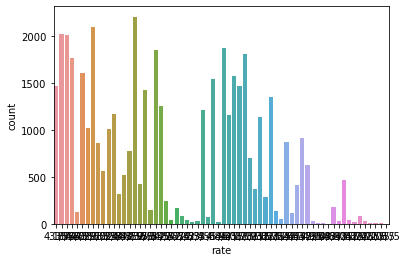

In [11]:
# The Rate Column 
# Let's See it's Distribution  and We See that It hasn't many outliers So It'd be Ok to fill null Values with Mode
# We Notice that there is no obviously visible outliers
sns.countplot(Z_Data['rate'])
Z_Data['rate'] = Z_Data['rate'].fillna(Z_Data['rate'].mode()[0])

In [12]:
#Handling Null Values in Location,rest_type,cuisines and approx_cost 
# as The Null Values is a Very Small part of The Data It'd be Ok to delete Those Rows
Z_Data['location']=Z_Data['location'].dropna()
Z_Data['rest_type']=Z_Data['rest_type'].dropna()
Z_Data['cuisines']=Z_Data['cuisines'].dropna()
Z_Data['approx_cost(for two people)']=Z_Data['approx_cost(for two people)'].dropna()

In [13]:
#By Dropping Some Columns of Lesser Importance to The Main Goal
Z_Data.drop(['url','address','phone'],axis=1,inplace=True)
#By Dropping The Menu_item Column as we're interested in other Important Features to The Goal
Z_Data['menu_item'].unique()
Z_Data.drop(['menu_item'],axis=1,inplace=True)
Z_Data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [14]:
#By Turning The Rates Column into Integer
Z_Data['rate'].unique()
Z_Data = Z_Data.loc[Z_Data.rate !='NEW']
Z_Data = Z_Data.loc[Z_Data.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
Z_Data.rate = Z_Data.rate.apply(remove_slash).str.strip().astype('float')
Z_Data['rate']=Z_Data['rate']/5

<ipython-input-14-3dddcc1d2666>:5: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [15]:
#Adding New Column which is Target
#If The Rating>0.75 Then Yes else No 

Z_Data['target']=Z_Data['rate'].apply(lambda x:x>=0.75)  
target_choices={False:0, True:1}
Z_Data['target']=Z_Data['target'].map(target_choices)
Z_Data['target']

0        1
1        1
2        1
3        0
4        1
        ..
41660    0
41661    0
41662    0
41663    1
41664    0
Name: target, Length: 41665, dtype: int64

In [16]:
# By Taking it back to it's original Form
Z_Data['rate']=Z_Data['rate']*5
print(Z_Data['rate'].mean())

3.700448817952717


<AxesSubplot:xlabel='book_table'>

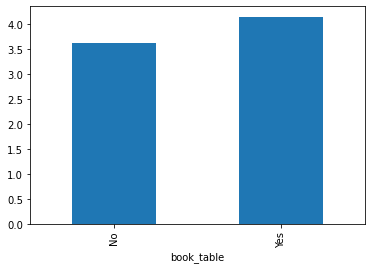

In [17]:
#Let's Compare The Distribution of Table Booking and Rating Service
Z_Data.groupby('book_table')['rate'].mean().plot.bar()

In [18]:
#Let's Encode The online_order Column where Yes : 1 and No : 1
Z_Data['online_order']=Binary_Encoding(Z_Data,'online_order')

In [19]:
Z_Data['online_order'].value_counts()

1    27206
0    14459
Name: online_order, dtype: int64

Text(0, 0.5, 'counts')

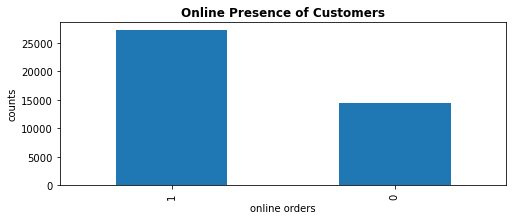

In [20]:
#Let's See The Online Presence of The Restaurants 
# From Here We See That most restaurants have Online Services
plt.figure(figsize=(8,3))
ax =Z_Data.online_order.value_counts().plot(kind='bar')
plt.title('Online Presence of Customers', weight='bold')
plt.xlabel('online orders')
plt.ylabel('counts')

In [21]:
#By Encoding Book_Table Column using 1 or 0 Encoding 
Z_Data['book_table']=Binary_Encoding(Z_Data,'book_table')

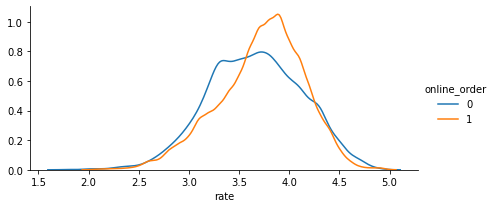

In [22]:
#The Relation between Online Order 
#From Here we See That The Existance of Online Services helps in increasing The Rating of The Restaurant
grid=sns.FacetGrid(Z_Data,hue='online_order',aspect=2)
grid.map(sns.kdeplot,'rate')
grid.add_legend()

In [23]:
#By Turning The approx_cost into a Numerical Column
Z_Data['approx_cost(for two people)'] = Z_Data['approx_cost(for two people)'].str.replace(',',"")
Z_Data['approx_cost(for two people)'] =Z_Data['approx_cost(for two people)'].astype('float') 
Z_Data=Z_Data.dropna(subset=['approx_cost(for two people)'])

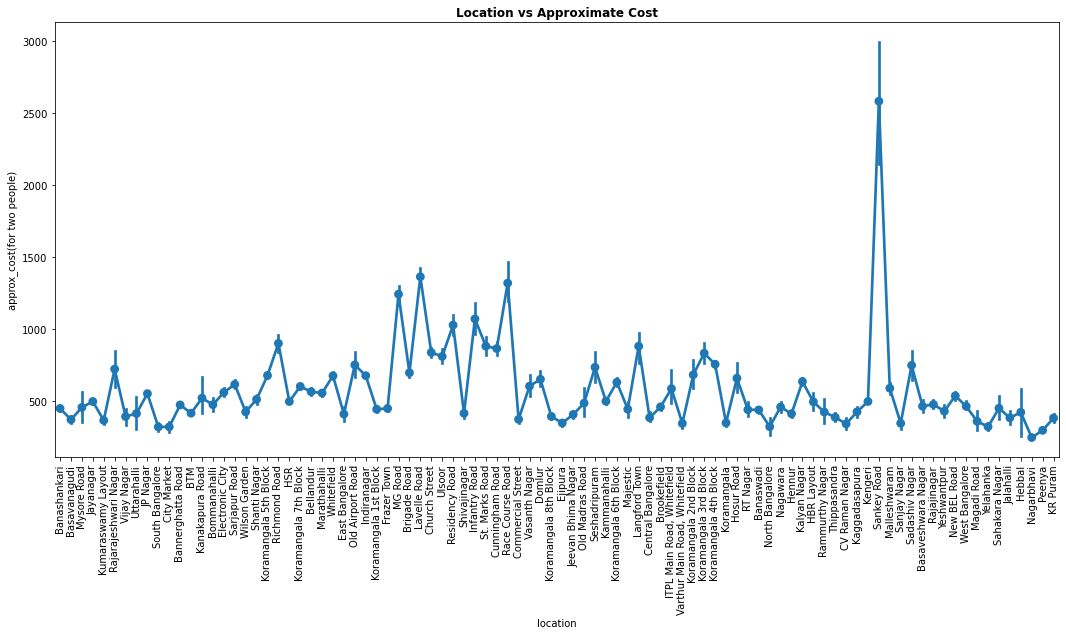

In [24]:
#Would The Location affect The Approximate Cost 
#From The Plot we See That It affects it Greatly as There are some Locations with high cost
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=Z_Data["location"], y=Z_Data["approx_cost(for two people)"], data=Z_Data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Location vs Approximate Cost', weight = 'bold')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Mysore Road'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'Kumaraswamy Layout'),
  Text(5, 0, 'Rajarajeshwari Nagar'),
  Text(6, 0, 'Vijay Nagar'),
  Text(7, 0, 'Uttarahalli'),
  Text(8, 0, 'JP Nagar'),
  Text(9, 0, 'South Bangalore'),
  Text(10, 0, 'City Market'),
  Text(11, 0, 'Bannerghatta Road'),
  Text(12, 0, 'BTM'),
  Text(13, 0, 'Kanakapura Road'),
  Text(14, 0, 'Bommanahalli'),
  Text(15, 0, 'Electronic City'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Wilson Garden'),
  Text(18, 0, 'Shanti Na

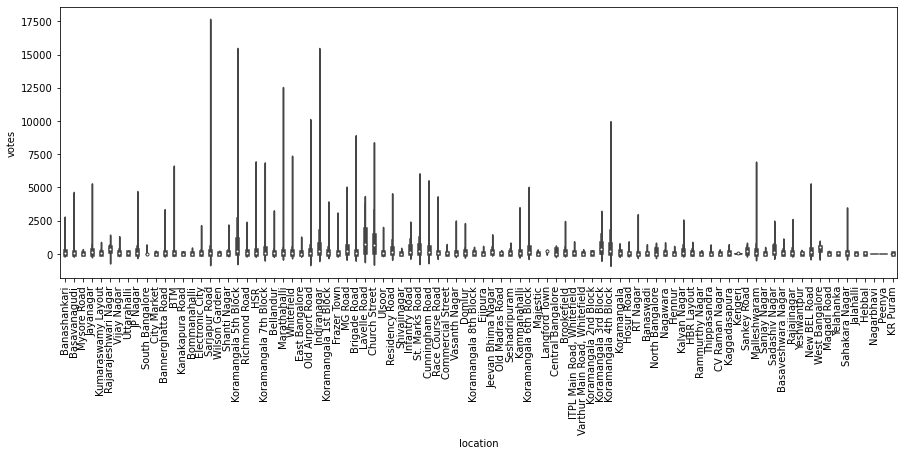

In [25]:
#Would The Location affects The Number of Votes granted? 
#We see That some Locations have higher votes
plt.figure(figsize=(15,5))
sns.violinplot(x='location',y='votes',data=Z_Data)
plt.xticks(rotation='vertical')

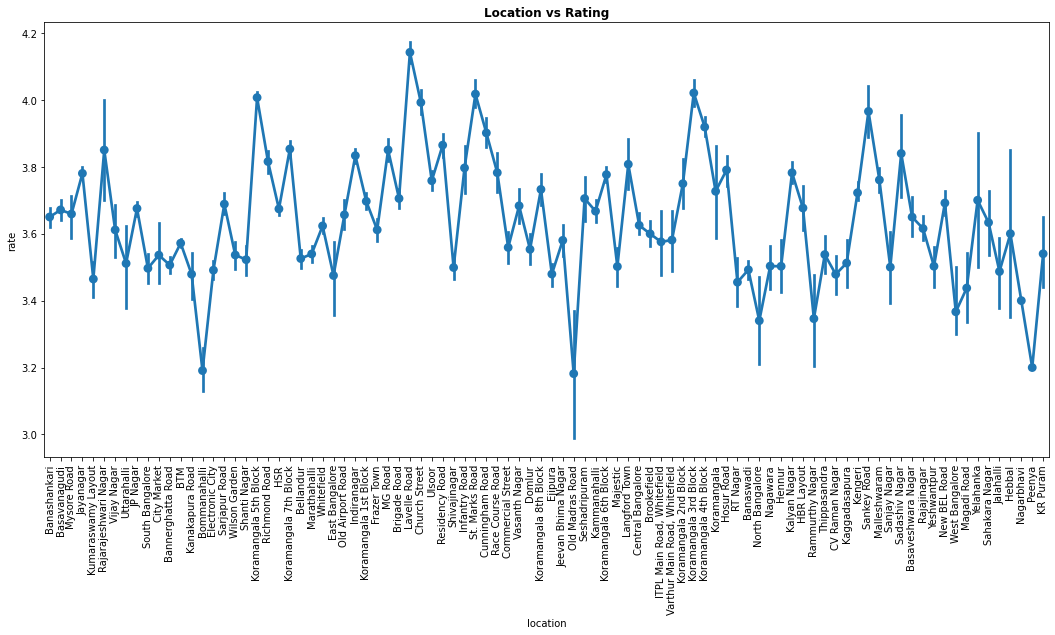

In [26]:
#Which Locations has the highest Rating?
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=Z_Data["location"], y=Z_Data["rate"], data=Z_Data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Location vs Rating', weight = 'bold')
plt.show()

In [27]:
#By Applying Target Encoding on Location 
#We used Target encoding as we want The Locations that are a Target to have higher Number
Z_Data=TargetEncoding('location','target',Z_Data)
Z_Data['location']

0        57
1        57
2        57
3        57
4        61
         ..
41660    45
41661    45
41662    45
41663    37
41664    37
Name: location, Length: 41418, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1.7999999999999998'),
  Text(1, 0, '2.0'),
  Text(2, 0, '2.1'),
  Text(3, 0, '2.2'),
  Text(4, 0, '2.3'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.6'),
  Text(8, 0, '2.7'),
  Text(9, 0, '2.8'),
  Text(10, 0, '2.9'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.1'),
  Text(13, 0, '3.2'),
  Text(14, 0, '3.3'),
  Text(15, 0, '3.3999999999999995'),
  Text(16, 0, '3.5'),
  Text(17, 0, '3.5999999999999996'),
  Text(18, 0, '3.7'),
  Text(19, 0, '3.8'),
  Text(20, 0, '3.9000000000000004'),
  Text(21, 0, '4.0'),
  Text(22, 0, '4.1'),
  Text(23, 0, '4.2'),
  Text(24, 0, '4.3'),
  Text(25, 0, '4.4'),
  Text(26, 0, '4.5'),
  Text(27, 0, '4.6'),
  Text(28, 0, '4.7'),
  Text(29, 0, '4.8'),
  Text(30, 0, '4.9')])

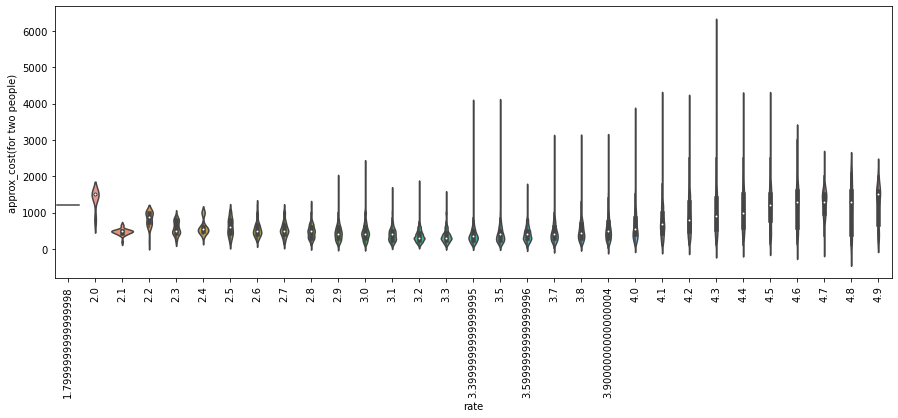

In [28]:
#Would Rating affect The Price?
#
plt.figure(figsize=(15,5))
sns.violinplot(x='rate',y='approx_cost(for two people)',data=Z_Data)
plt.xticks(rotation='vertical')

In [29]:
#In here we see How Correlated They are
Z_Data['rate'].corr(Z_Data['approx_cost(for two people)'])

0.38518254147966224

In [30]:
Z_Data['location'].corr(Z_Data['approx_cost(for two people)'])

0.26878032661513995

In [31]:
Z_Data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),target
0,Jalsa,1,1,4.1,775,57,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,1
1,Spice Elephant,1,0,4.1,787,57,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,1
2,San Churro Cafe,1,0,3.8,918,57,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,57,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,0
4,Grand Village,0,0,3.8,166,61,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,1


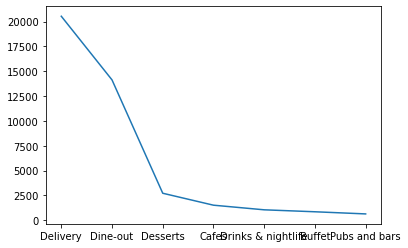

In [32]:
#Identifying The Locality of The Restaurants
#From Here we See that Most of The Restaurants are Delivery Restaurants
plt.plot(Z_Data['listed_in(type)'].value_counts())

In [33]:
#By Applying One Hot Encoding on listed_in(type) to distribute and add New Features
Z_Data['listed_in(type)'].value_counts()
Z_Data=One_Hot_Encoder(Z_Data,'listed_in(type)')

In [34]:
#By Applying Target Encoding as we want Cities that are a Target for Customers to have higher Number
Z_Data=TargetEncoding('listed_in(city)','target',Z_Data)

In [35]:
#Let's See The Correlation between city and Target
Z_Data['listed_in(city)'].corr(Z_Data['target'])

0.16094242322633434

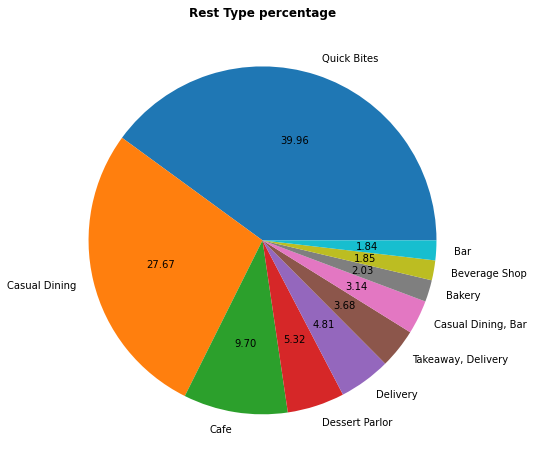

In [36]:
# Top 10 Rest Type That Exists
# To See The Percentage of Rest Types
plt.figure(figsize=(8,8))
values = Z_Data.rest_type.value_counts()[:10]
labels = Z_Data['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Rest Type percentage', weight='bold')
plt.show()

In [37]:
# Let's Encode The Other Features Numerically 
for column in Z_Data.columns[~Z_Data.columns.isin(['online_order','book_table','rate','votes','location','approx_cost(for two people)','target'])]:
        Z_Data[column] = Z_Data[column].factorize()[0]
Z_Data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(city),target,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,0,1,1,4.1,775,57,0,0,800.0,0,0,1,0,0,0,0,0,0,0
1,1,1,0,4.1,787,57,0,1,800.0,1,0,1,0,0,0,0,0,0,0
2,2,1,0,3.8,918,57,1,2,800.0,2,0,1,0,0,0,0,0,0,0
3,3,0,0,3.7,88,57,2,3,300.0,3,0,0,0,0,0,0,0,0,0
4,4,0,0,3.8,166,61,0,4,600.0,4,0,1,0,0,0,0,0,0,0


In [38]:
# By Splitting The Data to Apply The Classification Model
X=Z_Data.drop(['target'],axis=1)
Y=Z_Data['target']
X

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(city),listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,0,1,1,4.1,775,57,0,0,800.0,0,0,0,0,0,0,0,0,0
1,1,1,0,4.1,787,57,0,1,800.0,1,0,0,0,0,0,0,0,0
2,2,1,0,3.8,918,57,1,2,800.0,2,0,0,0,0,0,0,0,0
3,3,0,0,3.7,88,57,2,3,300.0,3,0,0,0,0,0,0,0,0
4,4,0,0,3.8,166,61,0,4,600.0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41660,2715,0,0,3.7,34,45,28,204,800.0,4041,29,1,0,0,0,0,0,1
41661,1725,0,0,2.5,81,45,28,765,800.0,21153,29,1,0,0,0,0,0,1
41662,6586,0,0,3.6,27,45,17,240,1500.0,21027,29,1,0,0,0,0,0,1
41663,6623,0,1,4.3,236,37,17,237,2500.0,21125,29,1,0,0,0,0,0,1


In [39]:
# By checking The Null Values
Z_Data.isna().sum()

name                                  0
online_order                          0
book_table                            0
rate                                  0
votes                                 0
location                              0
rest_type                             0
cuisines                              0
approx_cost(for two people)           0
reviews_list                          0
listed_in(city)                       0
target                                0
listed_in(type)_Buffet                0
listed_in(type)_Cafes                 0
listed_in(type)_Delivery              0
listed_in(type)_Desserts              0
listed_in(type)_Dine-out              0
listed_in(type)_Drinks & nightlife    0
listed_in(type)_Pubs and bars         0
dtype: int64

In [40]:
#Ordering Features based on Importance to see The Features that affect in being Target mostly
#In here we see The Main Factors that would make the Restaurants a Target for Customers
imp=pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
rate,0.693103
name,0.529279
reviews_list,0.403605
votes,0.308105
cuisines,0.260320
approx_cost(for two people),0.085703
rest_type,0.083351
book_table,0.082859
location,0.062505
listed_in(city),0.016308


In [41]:
#Dropping Some Columns due to lesser importance
Z_Data.drop(columns=['listed_in(type)_Dine-out','listed_in(type)_Cafes','listed_in(type)_Drinks & nightlife','listed_in(type)_Pubs and bars','online_order','listed_in(city)','listed_in(type)_Buffet','listed_in(type)_Delivery','location','book_table','rest_type','approx_cost(for two people)'],axis=1,inplace=True)

In [42]:
#Applying Random Forest Technique
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
#First Option
ML_Model=RandomForestClassifier(max_depth=30)

In [44]:
Model=ML_Model.fit(X_train,Y_train)
print("Training_Score : {}".format(Model.score(X_train,Y_train)))

Training_Score : 1.0


In [45]:
Y_prediction=Model.predict(X_test)
print("Predictions are : {}".format(Y_prediction))

Predictions are : [0 1 1 ... 1 0 1]


In [46]:
from sklearn import metrics
from sklearn import metrics
class_score=accuracy_score(Y_test,Y_prediction)
print('score: {}'.format(class_score))
print('MSE : ',metrics.mean_squared_error(Y_test,Y_prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(Y_test,Y_prediction)))
#calculating precision and reall
precision = precision_score(Y_test,Y_prediction)
recall = recall_score(Y_test,Y_prediction)
print('Precision is : ',precision)
print('Recall is : ', recall)

score: 1.0
MSE :  0.0
RMSE :  0.0
Precision is :  1.0
Recall is :  1.0


In [47]:
# By Applying The Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV 
Reg_RF=RandomForestClassifier()
np.linspace(start=1000,stop=1200,num=6)
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]
max_features=['auto','sqrt']
max_depth=[int(x)for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]

In [48]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [49]:
rf_Random=RandomizedSearchCV(Reg_RF,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_Random.fit(X_train,Y_train)
rf_Random.best_params_
pred2=rf_Random.predict(X_test)
from sklearn import metrics
class_score2=accuracy_score(Y_test,pred2)
print('Score : ',class_score2)
print('MSE : ',metrics.mean_squared_error(Y_test,pred2))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(Y_test,pred2)))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Score :  1.0
MSE :  0.0
RMSE :  0.0


In [50]:
# Second Algorithm : Decision Trees 
from sklearn.model_selection import train_test_split
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X,Y,test_size=0.2,random_state=42)
ML_Model2=DecisionTreeClassifier(criterion='entropy')
Model2=ML_Model2.fit(X_train2,Y_train2)
Y_pred2=Model.predict(X_test2)
print("Training_Score : {}".format(Model.score(X_train2,Y_train2)))
print("Predictions are : {}".format(Y_pred2))
class_score2=accuracy_score(Y_test2,Y_pred2)
print('score: {}'.format(class_score2))
print('MSE : ',metrics.mean_squared_error(Y_test2,Y_pred2))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(Y_test2,Y_pred2)))
precision2 = precision_score(Y_test2,Y_pred2)
recall2 = recall_score(Y_test2,Y_pred2)
print('Precision is : ',precision2)
print('Recall is : ', recall2)

Training_Score : 1.0
Predictions are : [0 1 1 ... 1 0 1]
score: 1.0
MSE :  0.0
RMSE :  0.0
Precision is :  1.0
Recall is :  1.0


In [51]:
# Third Algorithm : XG Boost 
X_train3,X_test3,Y_train3,Y_test3=train_test_split(X,Y,test_size=0.2,random_state=42)
classifier3=XGBClassifier(booster='dart')
classifier3.fit(X_train3,Y_train3)
print("Training_Score : {}".format(classifier3.score(X_train3,Y_train3)))
Y_Prediction3=classifier3.predict(X_test3)
print('The Testing Accuracy is ',accuracy_score(Y_test3,Y_Prediction3))
precision3 = precision_score(Y_test3,Y_Prediction3)
recall3 = recall_score(Y_test3,Y_Prediction3)
print('Precision is : ',precision3)
print('Recall is : ', recall3)

Training_Score : 1.0
The Testing Accuracy is  1.0
Precision is :  1.0
Recall is :  1.0
